In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
label_names = pd.read_csv("data/label_names.csv")
vocabulary = pd.read_csv("data/vocabulary.csv")
train_labels = pd.read_csv("data/train_labels.csv", header=None, names=["id", "labels"])
validate_labels = pd.read_csv("data/validate_labels.csv", header=None, names=["id", "labels"])

## Lable names

In [4]:
label_names

,label_id,label_name
0,0,Games
1,1,Vehicle
2,2,Video game
3,3,Concert
4,4,Car
5,5,Dance
6,6,Animation
7,7,Musician
8,8,Football
9,9,Music video


In [5]:
label = {}
for item in label_names.iterrows():
    label_id = item[1].label_id
    label_name = item[1].label_name
    label[label_id] = label_name

## Label details

In [6]:
vocabulary

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,865174,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,683166,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
2,2,522427,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
3,3,497487,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,373952,/m/0k4j,Car,https://en.wikipedia.org/wiki/Car,Autos & Vehicles,NaN,NaN,"A car is a wheeled, self-powered motor vehicle..."
5,5,305143,/m/026bk,Dance,https://en.wikipedia.org/wiki/Dance,Arts & Entertainment,NaN,NaN,Dance is a performance art form consisting of ...
6,6,299054,/m/0hcr,Animation,https://en.wikipedia.org/wiki/Animation,Arts & Entertainment,NaN,NaN,Animation is the process of making the illusio...
7,7,296577,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...
8,8,219506,/m/02vx4,Association football,https://en.wikipedia.org/wiki/Association_foot...,Sports,NaN,NaN,"Association football, more commonly known as f..."
9,9,217037,/m/0mdxd,Music video,https://en.wikipedia.org/wiki/Music_video,Arts & Entertainment,NaN,NaN,A music video is a short film integrating a so...


In [7]:
vertical_dict = {}
with open("vertical.tsv", "w") as F:
    lines = []
    for num, item in vocabulary.iterrows():
        index = item["Index"]
        vertical = item["Vertical1"]
        if vertical not in vertical_dict:
            vertical_dict[vertical] = len(vertical_dict)
        lines.append("%d\t%d\n" % (index, vertical_dict[vertical]))
    F.writelines(lines)

In [8]:
print len(vertical_dict)

25


## Training labels

In [9]:
train_labels

,id,labels
0,--DwgB78t-c,16 5 430
1,--NZRkXBV7k,128 3 39 7 44 13 16 30
2,--hoQ2sGG4M,694
3,--ABhs9ik7c,2232 1 4 517 270
4,--sBoaqBlzA,45 125
5,--7h1S4neDM,0 48 10 356
6,--F672jfCMo,488 1067 1078
7,--ezS5q-mZg,1 962 12 625
8,--XT8O4T3Wc,379 6
9,--Qgwg7mGZY,0 33 2 2379 3423


### show some of the label combinations

In [10]:
i = 0
for item in train_labels.iterrows():
    labels = item[1]["labels"]
    for l in sorted(map(int, labels.split())):
        print "%d-%s" % (l, label[l]), "/",
    print ""
    i += 1
    if i >= 10000:
        break

5-Dance / 16-Performance art / 430-Ballroom dance / 
3-Concert / 7-Musician / 13-Musical ensemble / 16-Performance art / 30-Drummer / 39-Drums / 44-Drums / 128-Cymbal / 
694-Tai chi / 
1-Vehicle / 4-Car / 270-Sedan / 517-Audi / 2232-Audi A3 / 
45-Cosmetics / 125-Television / 
0-Games / 10-Animal / 48-Pet / 356-Star / 
488-Door / 1067-Lock / 1078-Installation art / 
1-Vehicle / 12-Food / 625-Factory / 962-McDonald's / 
6-Animation / 379-Touhou Project / 
0-Games / 2-Video game / 33-Weapon / 2379-Tom Clancy's Ghost Recon / 3423-Tom Clancy's Ghost Recon: Future Soldier / 
23-Mobile phone / 29-Smartphone / 37-Gadget / 72-iPhone / 189-iPad / 330-Money / 331-iPod touch / 373-Clash of Clans / 768-Diamond / 
20-Trailer / 
0-Games / 2-Video game / 432-Kingdom Hearts / 665-Kingdom Hearts / 836-Sora / 2779-Universe of Kingdom Hearts / 
118-Grand Theft Auto V / 
6-Animation / 
1-Vehicle / 4-Car / 114-Engine / 1395-Valve / 3409-Nissan Altima / 
276-Room / 
6-Animation / 967-Text / 1206-Cinema 4D / 

### statistics for label-sample coverage

In [11]:
i = 0
label_sample_set = {}
for item in train_labels.iterrows():
    labels = item[1]["labels"]
    for l in sorted(map(int, labels.split())):
        if l not in label_sample_set:
            label_sample_set[l] = set()
        label_sample_set[l].add(i)
    i += 1

In [14]:
x = range(4716)
y = [0] * 4716
s = set()
for l in x:
    s.update(label_sample_set[l])
    y[l] = len(s)

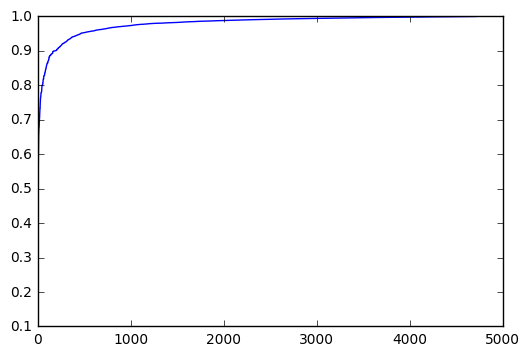

In [19]:
max_y = float(y[-1])
norm_y = [item/max_y for item in y]
plt.plot(x, norm_y)
plt.show()

In [22]:
norm_y[200]

0.9011726918107226

## Validate labels

In [12]:
validate_labels

,id,labels
0,--h7o0bAOpk,0 2 581 111 55 317
1,--O5HgNtvSc,208 1 3073 1294 1073
2,--q4Vg_nqEw,0 656 2 19 2677
3,--wpV2HK8zQ,676 28
4,--4eRn5OaI8,3105
5,---FI9JLZRg,0 2944
6,--vnrH7mF1k,1 484 345
7,--7Z6cyWKmk,361 3
8,--JGGtGgoqI,0 51 373
9,--jKa62hkw0,5


In [13]:
i = 0
for item in validate_labels.iterrows():
    labels = item[1]["labels"]
    for l in sorted(map(int, labels.split())):
        print "%d-%s" % (l, label[l]), "/",
    print ""
    i += 1
    if i >= 10000:
        break

0-Games / 2-Video game / 55-Video game console / 111-PlayStation 3 / 317-PlayStation / 581-PlayStation / 
1-Vehicle / 208-Wood / 1073-Chainsaw / 1294-Logging / 3073-Log splitter / 
0-Games / 2-Video game / 19-PC game / 656-Metal Gear / 2677-Metal Gear Online / 
28-Fashion / 676-Handbag / 
3105-Numerical digit / 
0-Games / 2944-La Tale / 
1-Vehicle / 345-Loudspeaker / 484-Subwoofer / 
3-Concert / 361-Flamenco / 
0-Games / 51-Strategy video game / 373-Clash of Clans / 
5-Dance / 
1-Vehicle / 4-Car / 519-Recreational vehicle / 659-Van / 1828-Campervan / 
1-Vehicle / 4-Car / 94-Dashcam / 575-Traffic / 
6-Animation / 15-Cartoon / 37-Gadget / 298-Television advertisement / 
126-The Walt Disney Company / 200-Doll / 232-Cake / 
3-Concert / 5-Dance / 624-Number / 
18-Outdoor recreation / 83-Skateboarding / 108-Skateboard / 
0-Games / 8-Football / 76-Ball / 
0-Games / 599-Dofus / 
8-Football / 
593-Moon / 
0-Games / 2-Video game / 1220-New Super Mario Bros / 
10-Animal / 18-Outdoor recreation / 